In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
df=pd.read_csv('Relatorio.csv')
df

,Atleta ID,Tipo de atividade,Data,Distância,Calorias,Tempo,Cadência de corrida média,Cadência bicicleta média,Ritmo médio,Total de braçadas,Média de Swolf,Tempo em movimento,Velocidade
0,Bruna,Ciclismo em local fechado,2021-10-05 10:04:44,14170.0,567,3608.0,0,58,0,3384,0,3480.0,4.071839
1,Bruna,Ciclismo na montanha,2021-10-01 17:24:00,9700.0,201,2714.0,0,69,0,2740,0,2713.0,3.575378
2,Bruna,Ciclismo em estradas,2021-09-26 05:58:17,89970.0,"1,825",9024.0,0,74,0,11194,0,9020.0,9.974501
3,Bruna,Ciclismo em estradas,2021-09-25 07:16:25,15440.0,289,1800.0,0,77,0,2277,0,1798.0,8.587319
4,Bruna,Ciclismo em local fechado,2021-09-24 13:53:01,0.0,494,3306.0,0,74,0,4104,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,Bruna,Corrida,2017-11-08 08:01:32,31540.0,"1,672",8743.0,--,0,4:37,0,0,8735.0,3.610761
2473,Bruna,Corrida,2017-11-07 18:29:29,4420.0,242,1206.0,--,0,4:33,0,0,1206.0,3.665008
2474,Bruna,Corrida,2017-11-06 17:55:44,6520.0,323,2404.0,--,0,6:09,0,0,2399.0,2.717799
2475,Bruna,Corrida,2017-11-03 18:36:34,5970.0,290,2488.0,--,0,6:57,0,0,2481.0,2.406288


In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
df=df.dropna(how='all')

In [5]:
df['Data']=pd.to_datetime(df['Data'])

In [6]:
df_sw=df.loc[df['Tipo de atividade'].isin(['Natação em alto mar','Natação em piscina']),['Data','Velocidade']]

In [7]:
df_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 1040 to 1719
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        680 non-null    datetime64[ns]
 1   Velocidade  639 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [8]:
df_sw.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)

In [9]:
df['Velocidade'].value_counts()

0.000000    202
5.770956      2
1.056126      2
3.361345      2
1.042097      2
           ... 
1.073110      1
1.117943      1
3.813559      1
8.222310      1
1.099203      1
Name: Velocidade, Length: 2172, dtype: int64

In [10]:
df_sw['y'].sort_values()

1671    0.000000
1607    0.000000
1587    0.000000
1623    0.021505
1122    0.281404
          ...   
1715         NaN
1716         NaN
1717         NaN
1718         NaN
1719         NaN
Name: y, Length: 680, dtype: float64

In [11]:
df_sw=df_sw.dropna()

In [12]:
model=Prophet()
model.fit(df_sw)

In [13]:
future = model.make_future_dataframe(periods=168)
future.tail()

,ds
802,2022-03-12 10:58:13
803,2022-03-13 10:58:13
804,2022-03-14 10:58:13
805,2022-03-15 10:58:13
806,2022-03-16 10:58:13


In [14]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-12-01 06:46:20,0.969071,0.790163,1.138577
1,2017-12-13 12:22:02,0.978438,0.802381,1.140439
2,2017-12-14 12:11:48,0.964084,0.791806,1.137764
3,2017-12-15 12:10:28,0.993597,0.818643,1.157511
4,2017-12-19 12:04:01,1.016198,0.842138,1.187639


In [15]:
df_sw.tail()

,ds,y
1697,2017-12-19 12:04:01,1.005101
1698,2017-12-15 12:10:28,0.938567
1699,2017-12-14 12:11:48,0.886288
1700,2017-12-13 12:22:02,0.930788
1701,2017-12-01 06:46:20,0.941427


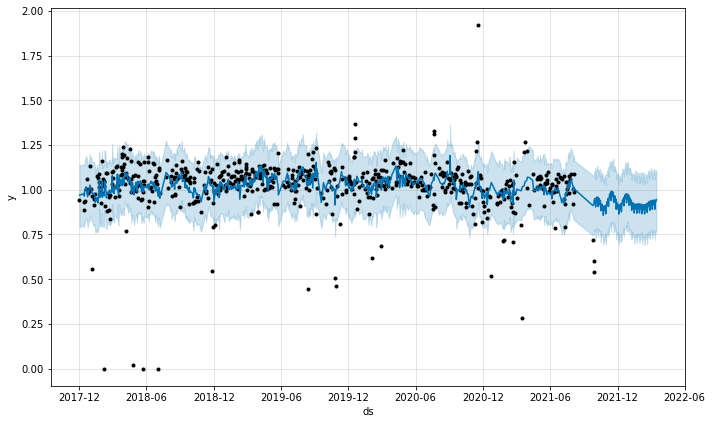

In [16]:
fig1 = model.plot(forecast)

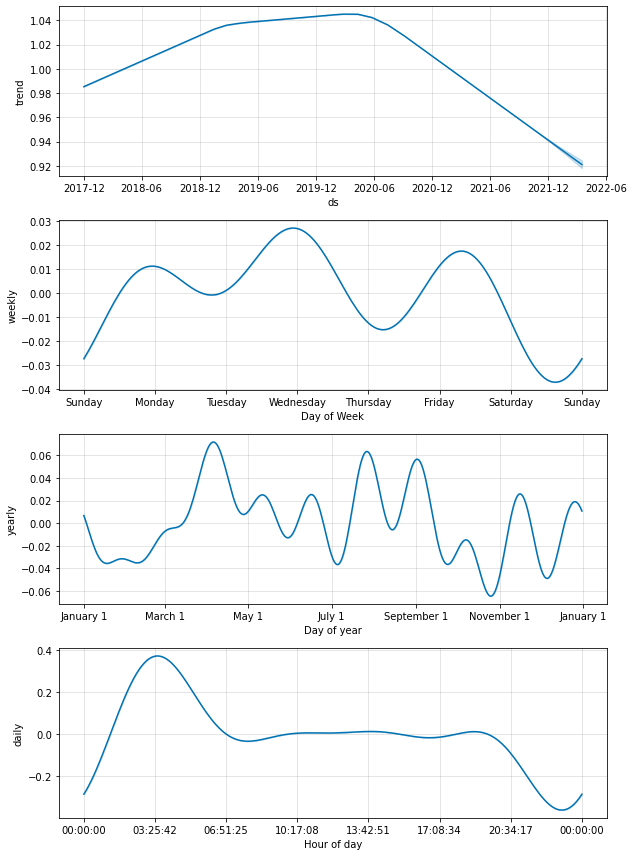

In [17]:
fig2 = model.plot_components(forecast)

In [18]:
df_sw2=df.loc[df['Tipo de atividade'].isin(['Natação em piscina']),['Data','Velocidade']]
df_sw2=df_sw2.drop(1583)
df_sw2.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_sw2=df_sw2.dropna()
model2=Prophet()
model2.fit(df_sw2)

In [19]:
future2 = model2.make_future_dataframe(periods=168)
future2.tail()

,ds
728,2022-01-15 14:47:59
729,2022-01-16 14:47:59
730,2022-01-17 14:47:59
731,2022-01-18 14:47:59
732,2022-01-19 14:47:59


In [20]:
forecast2 = model2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-12-13 12:22:02,0.994108,0.854973,1.134873
1,2017-12-14 12:11:48,0.962238,0.825458,1.104980
2,2017-12-15 12:10:28,0.997389,0.850390,1.144308
3,2017-12-19 12:04:01,1.010911,0.865214,1.160613
4,2017-12-20 12:17:52,1.028913,0.887695,1.168247


In [21]:
df_sw2.tail()

,ds,y
1696,2017-12-20 12:17:52,1.061807
1697,2017-12-19 12:04:01,1.005101
1698,2017-12-15 12:10:28,0.938567
1699,2017-12-14 12:11:48,0.886288
1700,2017-12-13 12:22:02,0.930788


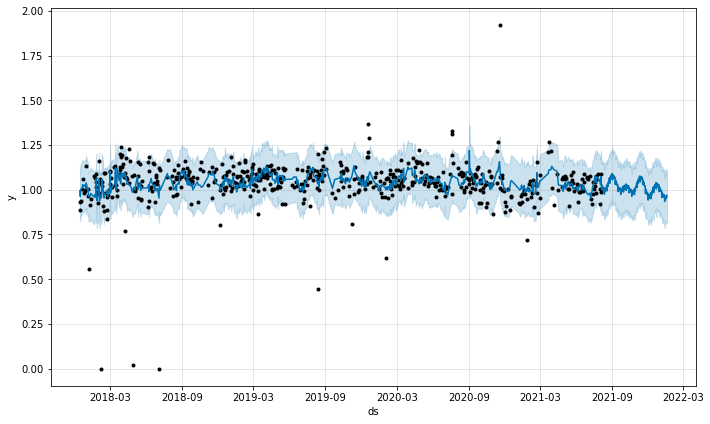

In [22]:
fig1 = model2.plot(forecast2)

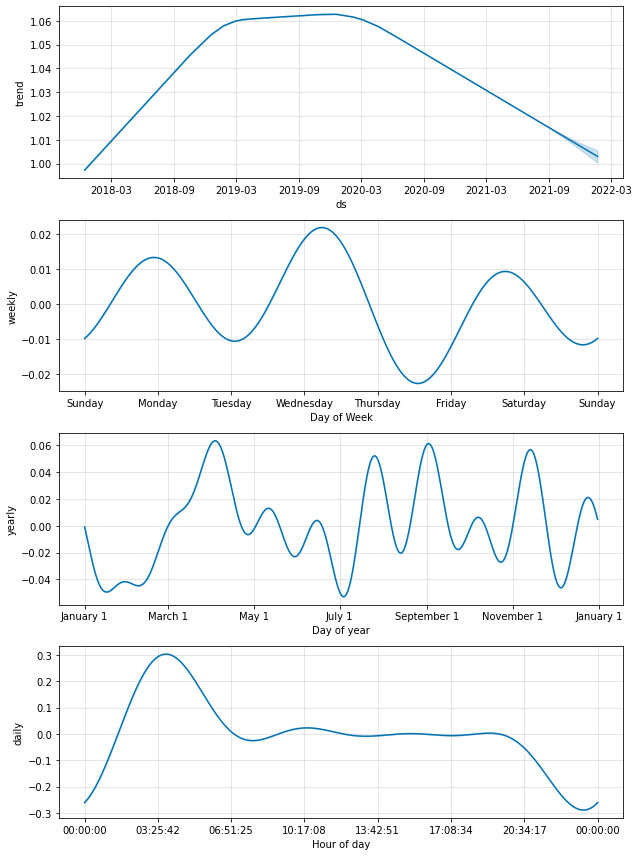

In [23]:
fig2 = model2.plot_components(forecast2)

In [24]:
df_sw3=df.loc[df['Tipo de atividade'].isin(['Natação em alto mar']),['Data','Velocidade']]
df_sw3.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_sw3=df_sw3.dropna()
model3=Prophet()
model3.fit(df_sw3)

In [25]:
future3 = model3.make_future_dataframe(periods=168)
future3.tail()

,ds
237,2022-03-12 10:58:13
238,2022-03-13 10:58:13
239,2022-03-14 10:58:13
240,2022-03-15 10:58:13
241,2022-03-16 10:58:13


In [26]:
forecast3 = model3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-12-01 06:46:20,1.121635,0.972713,1.285187
1,2018-01-12 17:01:14,0.894384,0.749769,1.046739
2,2018-01-13 10:28:36,0.915721,0.772114,1.071914
3,2018-04-20 12:19:55,1.138476,0.985859,1.299571
4,2018-04-21 07:04:14,0.988539,0.822775,1.144012


In [27]:
df_sw3.tail()

,ds,y
1625,2018-04-21 07:04:14,0.984761
1626,2018-04-20 12:19:55,1.058114
1685,2018-01-13 10:28:36,0.946978
1686,2018-01-12 17:01:14,0.975029
1701,2017-12-01 06:46:20,0.941427


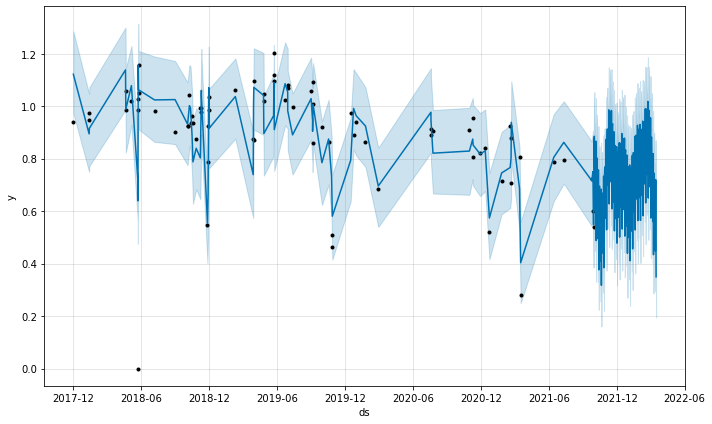

In [28]:
fig1 = model3.plot(forecast3)

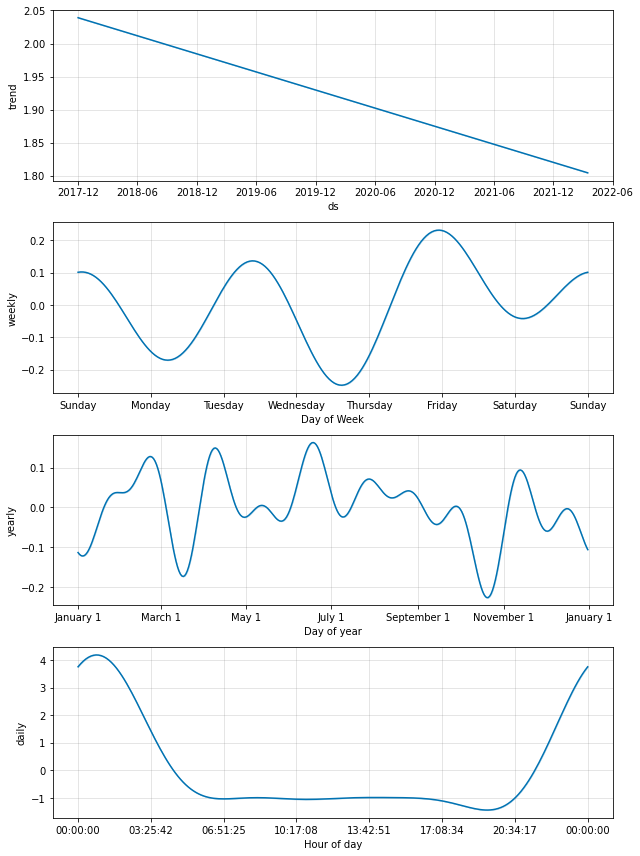

In [29]:
fig2 = model3.plot_components(forecast3)

In [30]:
from prophet.diagnostics import cross_validation
df_cv2 = cross_validation(model2, initial='365 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2019-02-11 14:47:59 and 2020-08-04 14:47:59


  0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
df_cv2.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-11 18:59:04,1.055281,0.889463,1.243861,1.106771,2019-02-11 14:47:59
1,2019-02-12 12:13:28,1.052446,0.885560,1.223507,1.076349,2019-02-11 14:47:59
2,2019-02-18 12:16:24,1.054552,0.891429,1.236596,1.051613,2019-02-11 14:47:59
3,2019-02-19 19:07:44,1.134141,0.957775,1.310483,0.967586,2019-02-11 14:47:59
4,2019-02-20 14:17:04,1.111503,0.939405,1.296711,1.063830,2019-02-11 14:47:59


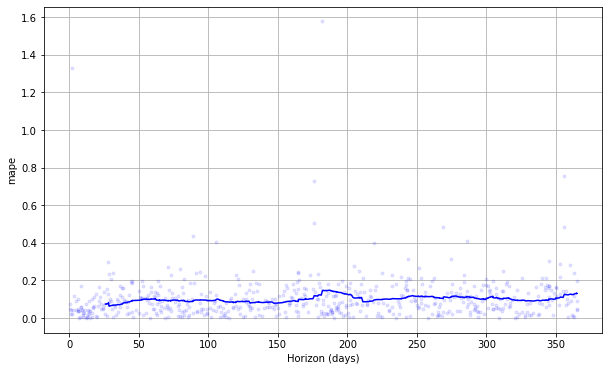

In [32]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv2, metric='mape')

In [33]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv2)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,25 days 22:46:22,0.010648,0.103190,0.064604,0.074283,0.044813,0.064077,0.966102
1,27 days 03:22:33,0.011046,0.105100,0.066471,0.076154,0.044813,0.065736,0.949153
2,27 days 03:43:14,0.010966,0.104718,0.065507,0.075114,0.044141,0.064739,0.949153
3,28 days 01:28:32,0.011254,0.106086,0.067350,0.076870,0.044813,0.066365,0.949153
4,28 days 02:48:22,0.012356,0.111156,0.070992,0.081250,0.044950,0.070069,0.932203


In [34]:
df_sw4=df.loc[df['Tipo de atividade'].isin(['Natação em piscina']),['Atleta ID', 'Tipo de atividade', 'Data', 'Distância', 'Calorias',
       'Tempo','Ritmo médio', 'Total de braçadas', 'Média de Swolf',
       'Tempo em movimento', 'Velocidade']]
df_sw4

,Atleta ID,Tipo de atividade,Data,Distância,Calorias,Tempo,Ritmo médio,Total de braçadas,Média de Swolf,Tempo em movimento,Velocidade
1049,Bruna,Natação em piscina,2021-09-16 12:06:59,2300.0,457,2538.0,1:39,1062,36,0.0,NaN
1050,Bruna,Natação em piscina,2021-09-15 06:17:46,3500.0,697,4215.0,1:32,1536,34,0.0,NaN
1051,Bruna,Natação em piscina,2021-09-14 12:35:16,3900.0,712,5477.0,1:30,1721,34,0.0,NaN
1052,Bruna,Natação em piscina,2021-09-13 09:43:05,4150.0,728,5099.0,1:35,1885,35,0.0,NaN
1053,Bruna,Natação em piscina,2021-09-12 07:56:53,2625.0,501,2768.0,1:32,1172,34,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1715,Bruna,Natação em piscina,2017-10-19 07:23:37,2625.0,596,4233.0,1:33,1058,34,0.0,NaN
1716,Bruna,Natação em piscina,2017-10-18 14:29:56,2650.0,490,2750.0,1:34,1130,34,0.0,NaN
1717,Bruna,Natação em piscina,2017-10-17 10:37:55,2525.0,471,2709.0,1:34,1105,35,0.0,NaN
1718,Bruna,Natação em piscina,2017-10-13 14:43:06,3000.0,554,3262.0,1:36,1296,35,0.0,NaN


In [35]:
df_sw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 1049 to 1719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Atleta ID           597 non-null    object        
 1   Tipo de atividade   597 non-null    object        
 2   Data                597 non-null    datetime64[ns]
 3   Distância           597 non-null    float64       
 4   Calorias            597 non-null    object        
 5   Tempo               597 non-null    float64       
 6   Ritmo médio         597 non-null    object        
 7   Total de braçadas   597 non-null    object        
 8   Média de Swolf      597 non-null    object        
 9   Tempo em movimento  597 non-null    float64       
 10  Velocidade          565 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 56.0+ KB


In [36]:
df.loc[1600, :]

Atleta ID                                  Bruna
Tipo de atividade             Natação em piscina
Data                         2018-06-07 17:17:02
Distância                                 1200.0
Calorias                                     199
Tempo                                     1243.0
Cadência de corrida média                      0
Cadência bicicleta média                       0
Ritmo médio                                 1:30
Total de braçadas                            531
Média de Swolf                                34
Tempo em movimento                        1085.0
Velocidade                              1.105991
Name: 1600, dtype: object

In [37]:
df_sw4=df_sw4.dropna()

In [38]:
df_sw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 1065 to 1700
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Atleta ID           565 non-null    object        
 1   Tipo de atividade   565 non-null    object        
 2   Data                565 non-null    datetime64[ns]
 3   Distância           565 non-null    float64       
 4   Calorias            565 non-null    object        
 5   Tempo               565 non-null    float64       
 6   Ritmo médio         565 non-null    object        
 7   Total de braçadas   565 non-null    object        
 8   Média de Swolf      565 non-null    object        
 9   Tempo em movimento  565 non-null    float64       
 10  Velocidade          565 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 53.0+ KB


In [39]:
df_sw4['Média de Swolf'].replace('--','0', inplace=True)

C:\Users\CelineArgon\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [40]:
df_sw4['Média de Swolf']=[float(i) for i in df_sw4['Média de Swolf']]

<ipython-input-40-3a56f3269334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sw4['Média de Swolf']=[float(i) for i in df_sw4['Média de Swolf']]


In [41]:
df_sw4['Média de Swolf'].describe()

count    565.000000
mean      36.332743
std        7.285155
min        0.000000
25%       34.000000
50%       35.000000
75%       36.000000
max       83.000000
Name: Média de Swolf, dtype: float64

In [42]:
filtro=df_sw4['Média de Swolf'] < 40
filtro

1065    True
1066    True
1067    True
1068    True
1069    True
        ... 
1696    True
1697    True
1698    True
1699    True
1700    True
Name: Média de Swolf, Length: 565, dtype: bool

In [43]:
df_sw4=df_sw4.loc[filtro,['Atleta ID', 'Tipo de atividade', 'Data', 'Distância', 'Calorias',
       'Tempo','Ritmo médio', 'Total de braçadas', 'Média de Swolf',
       'Tempo em movimento', 'Velocidade']]
df_sw4

,Atleta ID,Tipo de atividade,Data,Distância,Calorias,Tempo,Ritmo médio,Total de braçadas,Média de Swolf,Tempo em movimento,Velocidade
1065,Bruna,Natação em piscina,2021-08-04 14:47:59,3700.0,671,3727.0,1:32,1638,34.0,3394.0,1.090159
1066,Bruna,Natação em piscina,2021-08-04 10:07:25,2675.0,461,2984.0,1:42,1229,37.0,2715.0,0.985267
1067,Bruna,Natação em piscina,2021-08-02 17:03:01,4025.0,725,4756.0,1:40,1896,37.0,4006.0,1.004743
1068,Bruna,Natação em piscina,2021-08-02 12:08:07,2800.0,483,3243.0,1:48,1212,38.0,3034.0,0.922874
1069,Bruna,Natação em piscina,2021-07-27 13:23:03,4650.0,855,5626.0,1:32,2085,34.0,4264.0,1.090525
...,...,...,...,...,...,...,...,...,...,...,...
1696,Bruna,Natação em piscina,2017-12-20 12:17:52,3350.0,574,3968.0,1:34,1380,34.0,3155.0,1.061807
1697,Bruna,Natação em piscina,2017-12-19 12:04:01,3350.0,572,4041.0,1:39,1317,35.0,3333.0,1.005101
1698,Bruna,Natação em piscina,2017-12-15 12:10:28,550.0,88,4228.0,1:47,226,37.0,586.0,0.938567
1699,Bruna,Natação em piscina,2017-12-14 12:11:48,1325.0,228,4105.0,1:53,577,39.0,1495.0,0.886288


In [44]:
filtro2=df_sw4['Média de Swolf'] > 29
filtro2

1065    True
1066    True
1067    True
1068    True
1069    True
        ... 
1696    True
1697    True
1698    True
1699    True
1700    True
Name: Média de Swolf, Length: 529, dtype: bool

In [45]:
df_sw4=df_sw4.loc[filtro2,['Atleta ID', 'Tipo de atividade', 'Data', 'Distância', 'Calorias',
       'Tempo','Ritmo médio', 'Total de braçadas', 'Média de Swolf',
       'Tempo em movimento', 'Velocidade']]
df_sw4.to_csv('Relatorio_SW.csv',index=False)

In [46]:
df_sw5=df_sw4[['Data','Média de Swolf']]

In [47]:
df_sw4=df_sw4[['Data','Velocidade']]
df_sw4

,Data,Velocidade
1065,2021-08-04 14:47:59,1.090159
1066,2021-08-04 10:07:25,0.985267
1067,2021-08-02 17:03:01,1.004743
1068,2021-08-02 12:08:07,0.922874
1069,2021-07-27 13:23:03,1.090525
...,...,...
1696,2017-12-20 12:17:52,1.061807
1697,2017-12-19 12:04:01,1.005101
1698,2017-12-15 12:10:28,0.938567
1699,2017-12-14 12:11:48,0.886288


In [48]:
df_sw4.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_sw4=df_sw4.dropna()
model4=Prophet()
model4.fit(df_sw4)

df_sw5.rename(columns={'Data': 'ds','Média de Swolf': 'y'}, inplace=True)
df_sw5=df_sw5.dropna()
model5=Prophet()
model5.fit(df_sw5)

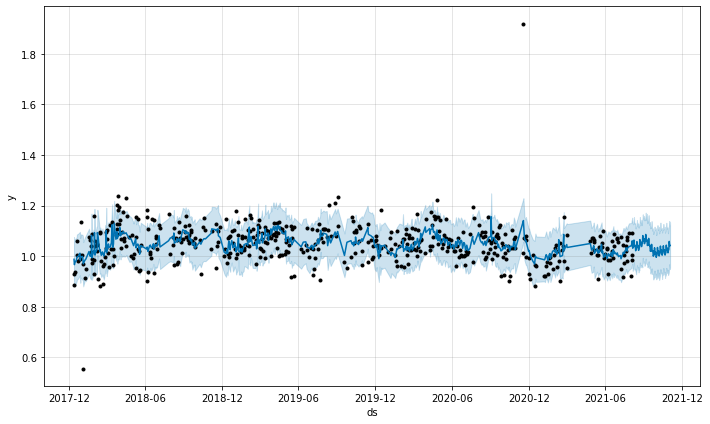

In [49]:
future4 = model4.make_future_dataframe(periods=90)
forecast4 = model4.predict(future4)
future5 = model5.make_future_dataframe(periods=90)
forecast5 = model5.predict(future5)

fig1 = model4.plot(forecast4)

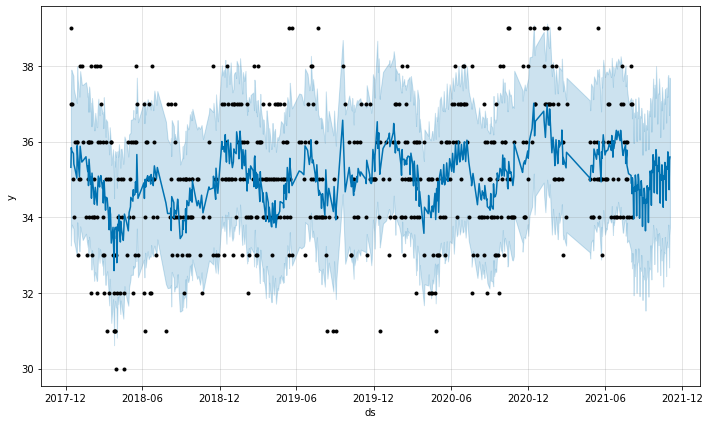

In [50]:
fig1 = model5.plot(forecast5)

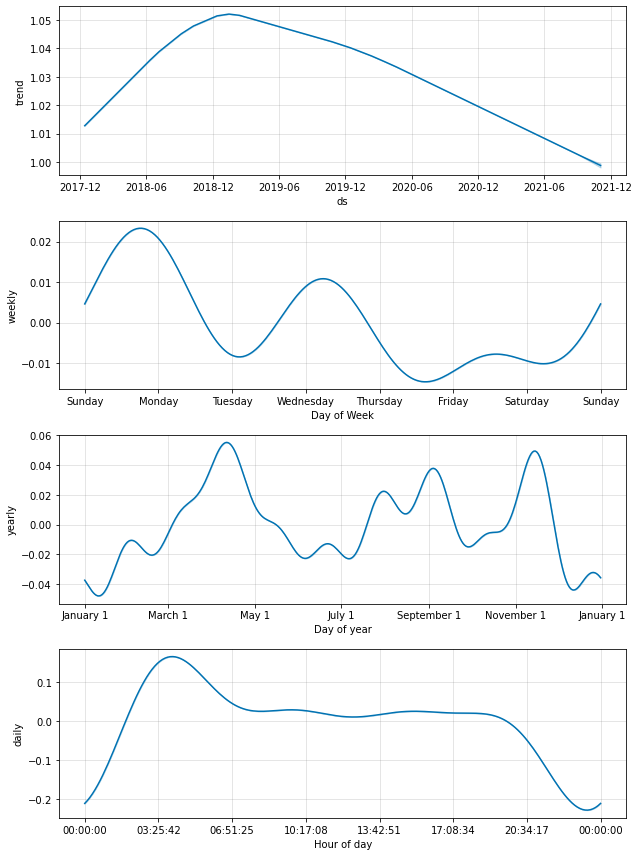

In [51]:
fig2 = model4.plot_components(forecast4)

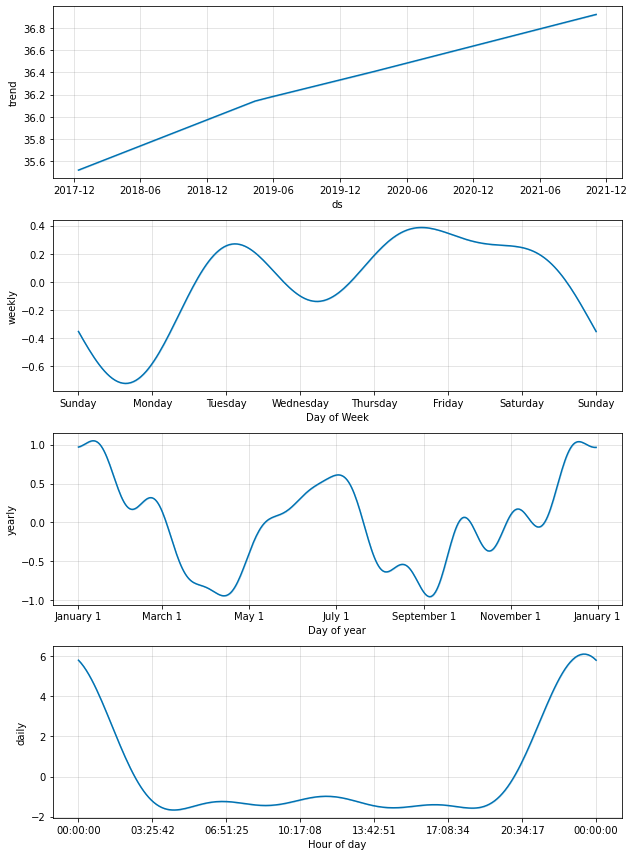

In [52]:
fig2 = model5.plot_components(forecast5)

In [53]:
df_sw6=df_sw4.loc[df_sw4['ds'].dt.year==2021]

In [54]:
df_sw6['ds'].dt.weekday.value_counts()

1    17
0    16
4    14
2    11
3     8
5     3
6     2
Name: ds, dtype: int64

In [55]:
df_sw6.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_sw6=df_sw6.dropna()
model6=Prophet()
model6.fit(df_sw6)

C:\Users\CelineArgon\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


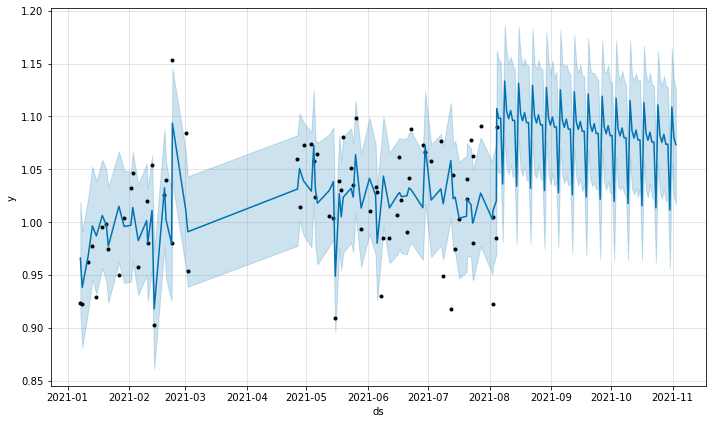

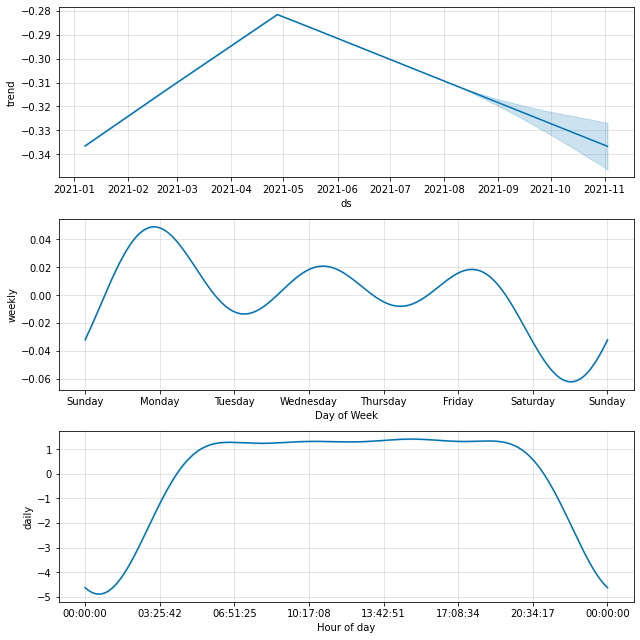

In [56]:
future6 = model6.make_future_dataframe(periods=90)
forecast6 = model6.predict(future6)
fig1 = model6.plot(forecast6)
fig2 = model6.plot_components(forecast6)

In [57]:
df_rn=df.loc[df['Tipo de atividade'].isin(['Corrida em esteira']),['Data','Velocidade']]

In [58]:
df_rn=df_rn.loc[df_rn['Data'].dt.year==2021]

In [59]:
df_rn['Data'].dt.weekday.value_counts()

2    15
0    14
1    12
4     8
3     6
5     4
6     4
Name: Data, dtype: int64

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


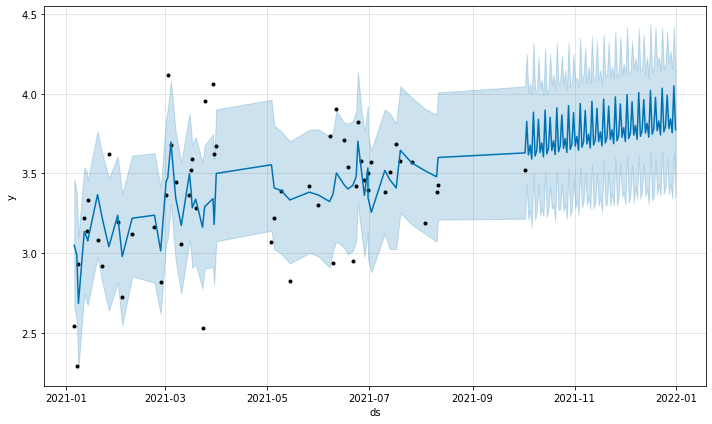

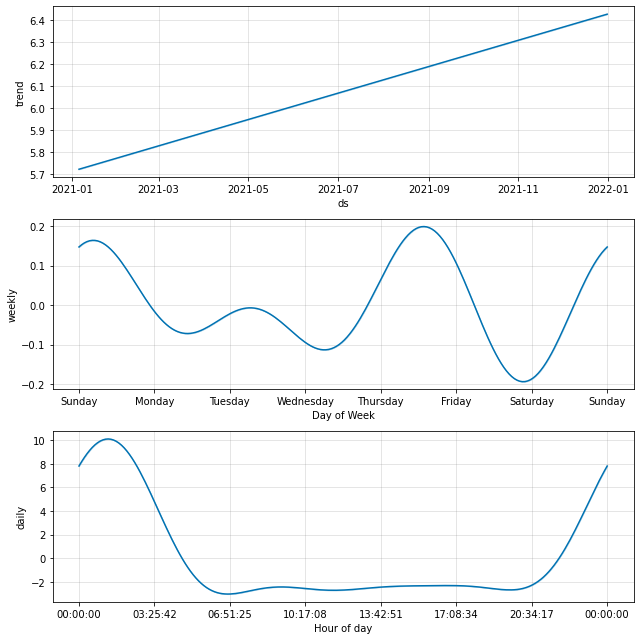

In [60]:
df_rn.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_rn=df_rn.dropna()
model_rn=Prophet()
model_rn.fit(df_rn)
future_rn = model_rn.make_future_dataframe(periods=90)
forecast_rn = model_rn.predict(future_rn)
fig1 = model_rn.plot(forecast_rn)
fig2 = model_rn.plot_components(forecast_rn)